In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
data = pd.read_csv('c:/Users/HOME/Downloads/PORTFOLIO_PROJECT/Video_games/cleaned_games_data.csv')

# Display the first few rows
print(data.head())

   pos              game           publisher  vgchartz_score  critic_score  \
0    1            Tetris  The Tetris Company             0.0           0.0   
1    2      Call of Duty          Activision             0.0           0.0   
2    3           Pokemon            Nintendo             0.0           0.0   
3    4  Grand Theft Auto      Rockstar Games             0.0           0.0   
4    5       Super Mario            Nintendo             0.0           0.0   

   user_score  total_shipped  total_sales  na_sales  pal_sales  ...  \
0         0.0         520.00          0.0       0.0        0.0  ...   
1         0.0         500.00          0.0       0.0        0.0  ...   
2         0.0         485.31          0.0       0.0        0.0  ...   
3         0.0         440.00          0.0       0.0        0.0  ...   
4         0.0         424.47          0.0       0.0        0.0  ...   

   release_date  last_update release_year release_month  release_day  \
0    1988-01-01   2020-02-27    

In [2]:
# Check the structure of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950 entries, 0 to 9949
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pos               9950 non-null   int64  
 1   game              9950 non-null   object 
 2   publisher         9950 non-null   object 
 3   vgchartz_score    9950 non-null   float64
 4   critic_score      9950 non-null   float64
 5   user_score        9950 non-null   float64
 6   total_shipped     9950 non-null   float64
 7   total_sales       9950 non-null   float64
 8   na_sales          9950 non-null   float64
 9   pal_sales         9950 non-null   float64
 10  japan_sales       9950 non-null   float64
 11  other_sales       9950 non-null   float64
 12  release_date      9730 non-null   object 
 13  last_update       3598 non-null   object 
 14  release_year      9950 non-null   int64  
 15  release_month     9950 non-null   int64  
 16  release_day       9950 non-null   int64  


# Analyze Trends and Distributions
a. Distribution of Global Sales

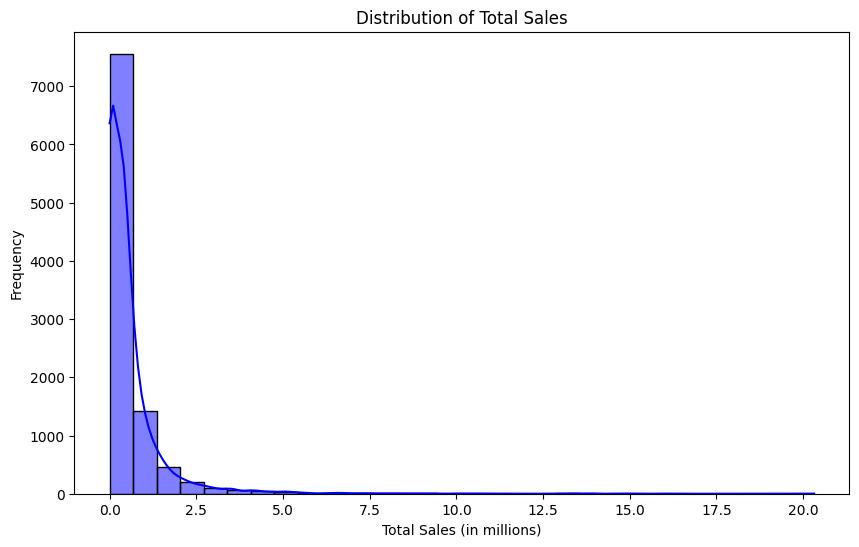

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

b. Top Publishers by Total Sales

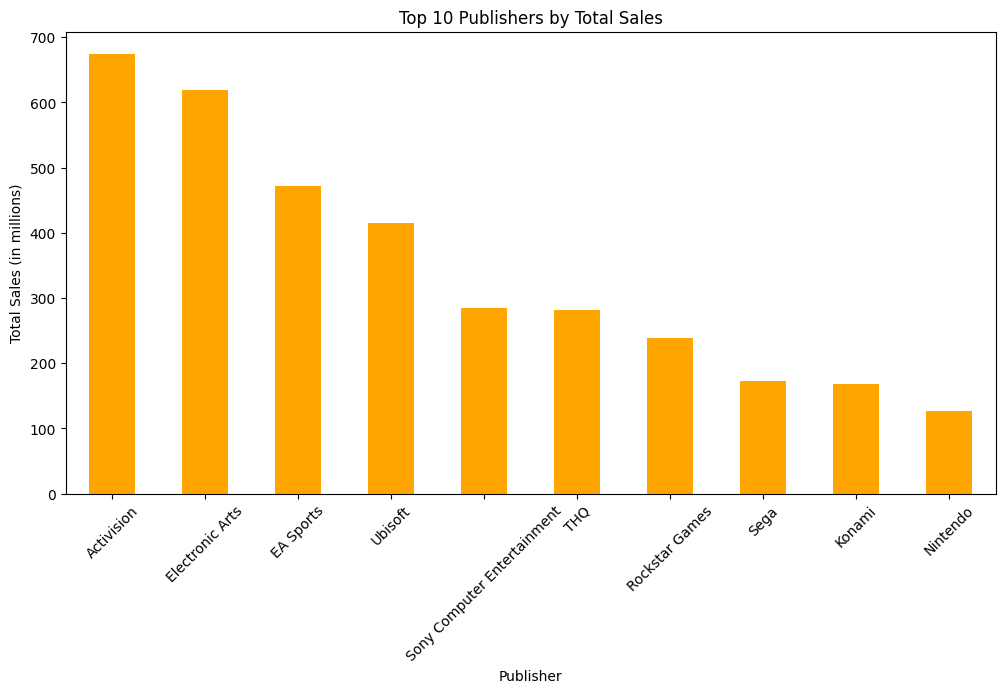

In [7]:
top_publishers = data.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Total Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

c. Top Games by Total Sales

C:\Users\HOME\AppData\Local\Temp\ipykernel_25796\664824111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='game', data=top_games, palette='viridis')


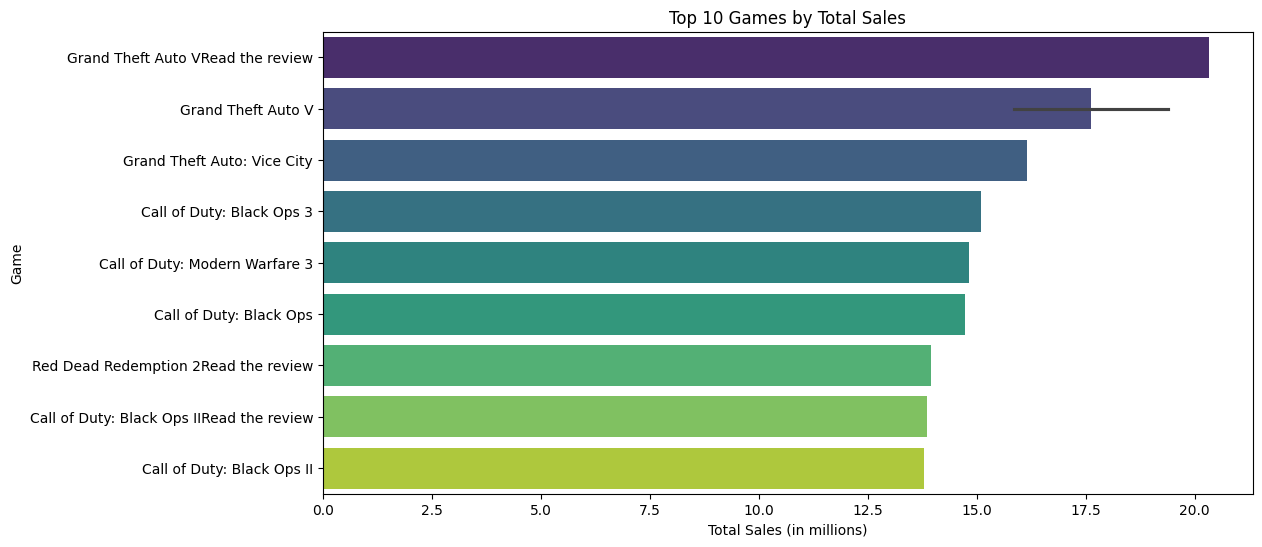

In [9]:
top_games = data[['game', 'total_sales']].sort_values(by='total_sales', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='game', data=top_games, palette='viridis')
plt.title('Top 10 Games by Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Game')
plt.show()

# Regional Sales Analysis
# a. Sales by Region

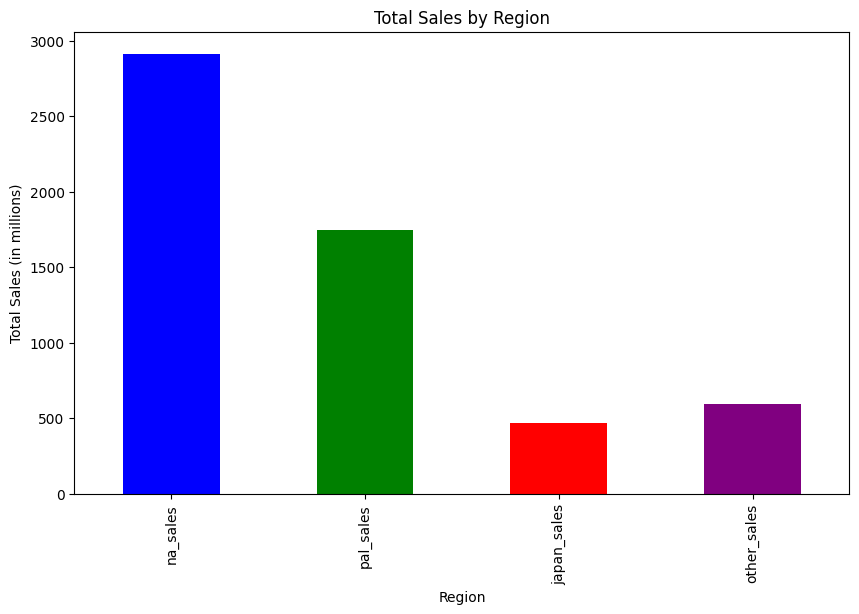

In [12]:
region_sales = data[['na_sales', 'pal_sales', 'japan_sales', 'other_sales']].sum()
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.show()

# b. Regional Sales Contribution

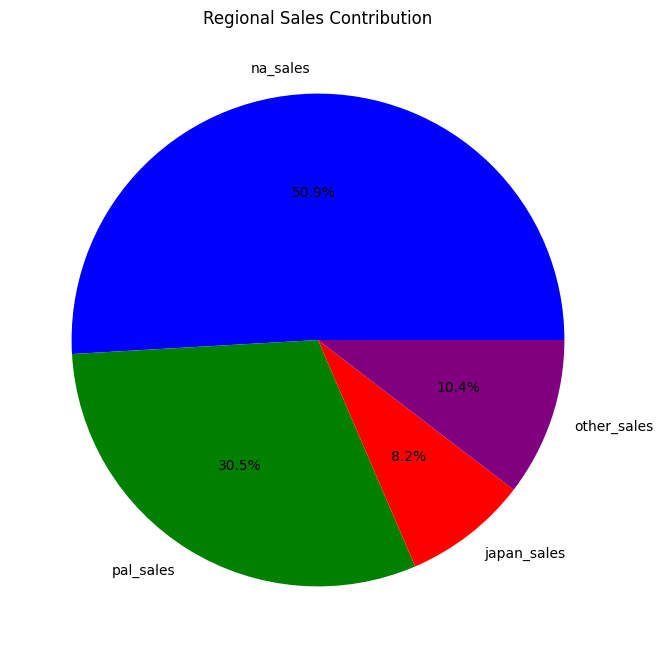

In [13]:
region_sales_percentage = region_sales / region_sales.sum() * 100
plt.figure(figsize=(8, 8))
region_sales_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
plt.title('Regional Sales Contribution')
plt.ylabel('')
plt.show()

# Time-Based Analysis
a. Game Releases Over the Years

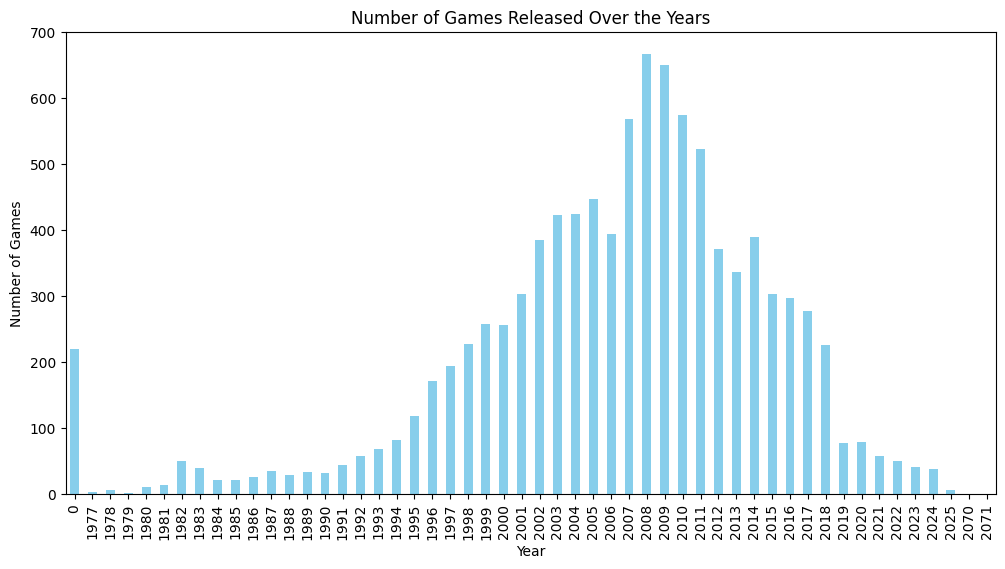

In [14]:
plt.figure(figsize=(12, 6))
data['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Games Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

b. Sales Trends Over the Years

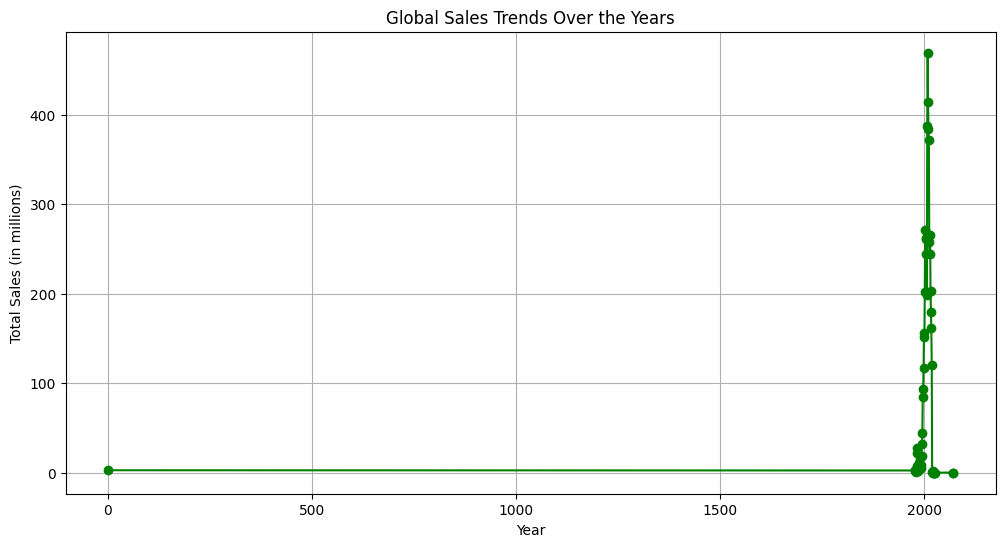

In [15]:
sales_trends = data.groupby('release_year')['total_sales'].sum()
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='line', marker='o', color='green')
plt.title('Global Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid()
plt.show()

# Insights from Scores
a. Correlation Between Scores and Sales

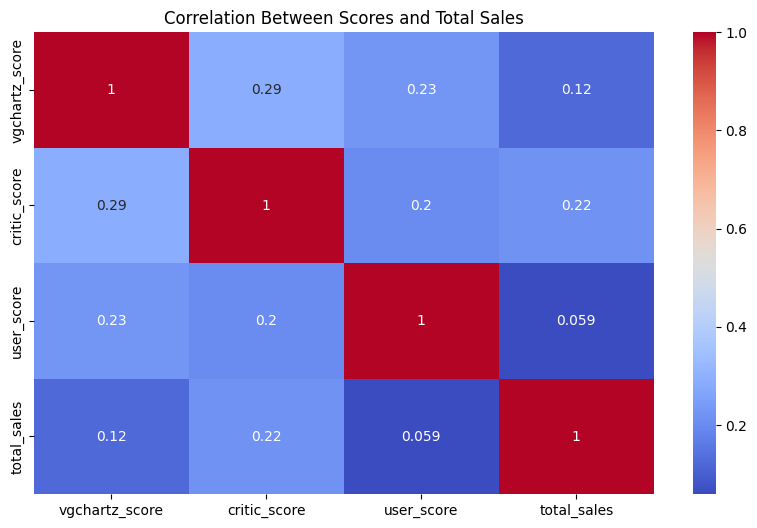

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['vgchartz_score', 'critic_score', 'user_score', 'total_sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores and Total Sales')
plt.show()

# b. Average Scores by Region

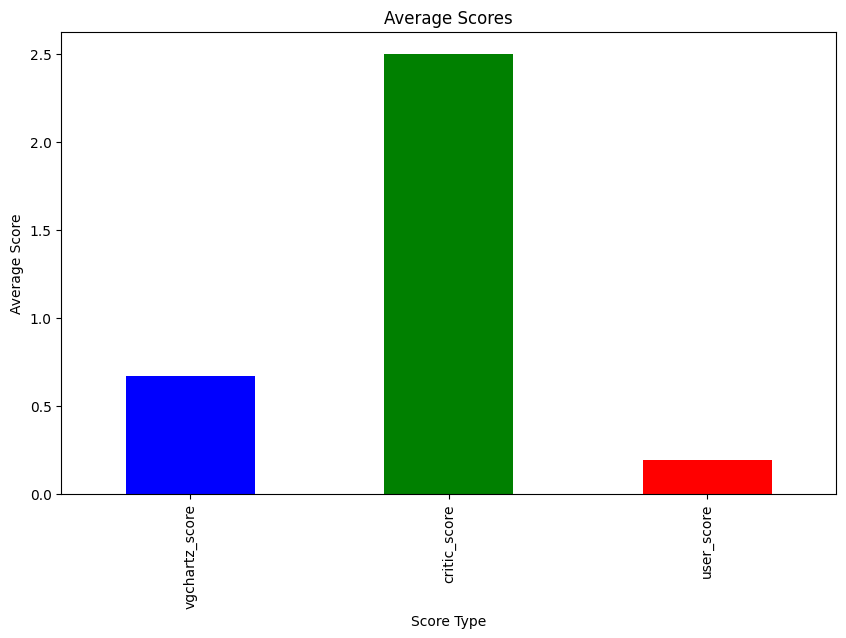

In [30]:
avg_scores = data[['vgchartz_score', 'critic_score', 'user_score']].mean()
plt.figure(figsize=(10, 6))
avg_scores.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Scores')
plt.xlabel('Score Type')
plt.ylabel('Average Score')
plt.show()

1. Clustering Analysis

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
# Select features for clustering
features = data[['total_sales', 'na_sales', 'pal_sales', 'japan_sales', 'other_sales', 'vgchartz_score', 'critic_score', 'user_score']].dropna()

In [33]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [34]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

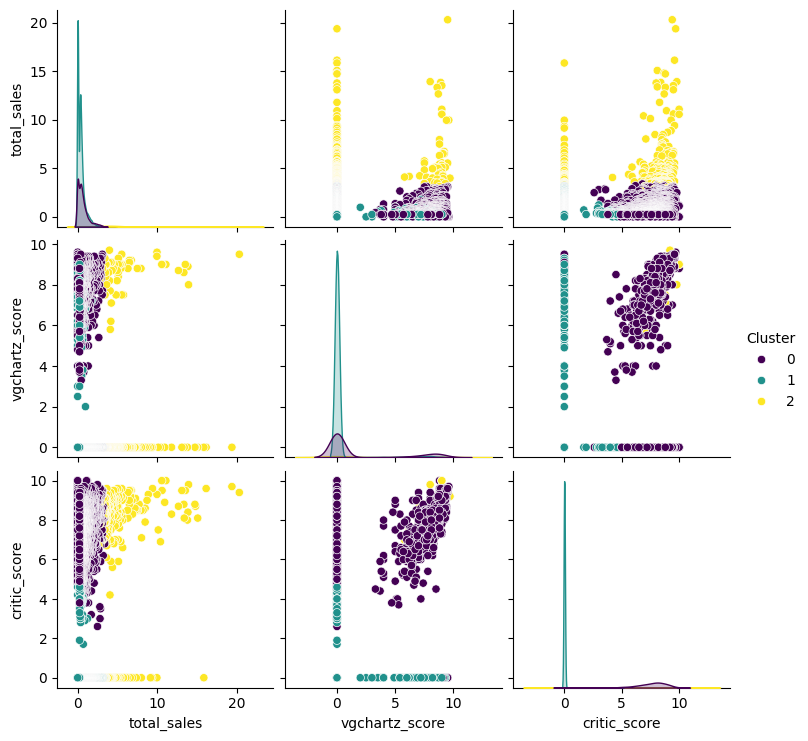

In [35]:
# Visualize clusters
sns.pairplot(data, vars=['total_sales', 'vgchartz_score', 'critic_score'], hue='Cluster', palette='viridis')
plt.show()

2. Predictive Modeling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Define features and target
X = data[['vgchartz_score', 'critic_score', 'user_score', 'na_sales', 'pal_sales', 'japan_sales', 'other_sales']].dropna()
y = data['total_sales'].dropna()

In [38]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.010661348676475772
R² Score: 0.9898300729281257


3. Time Series Analysis

C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, for

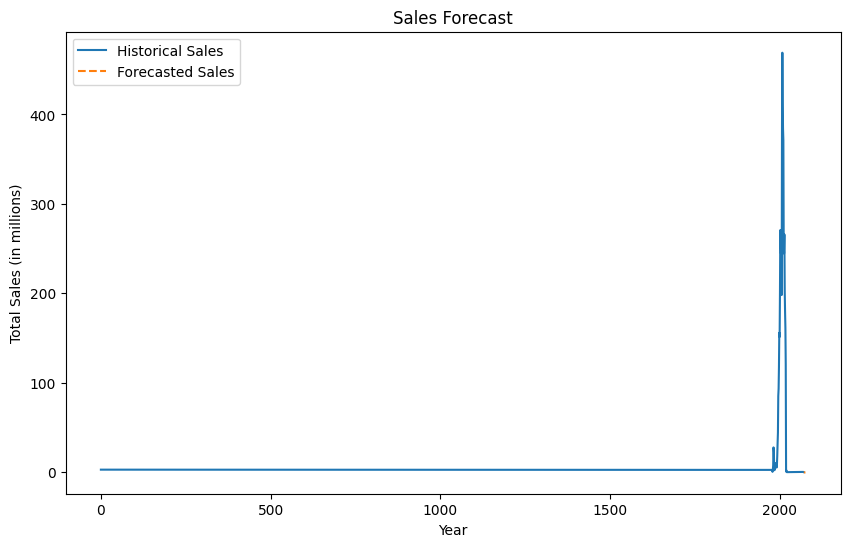

In [44]:
from statsmodels.tsa.arima.model import ARIMA  # Updated import

# Aggregate sales by year
sales_by_year = data.groupby('release_year')['total_sales'].sum()

# Fit an ARIMA model
model = ARIMA(sales_by_year, order=(1, 1, 1))  # Updated ARIMA usage
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.forecast(steps=5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year, label='Historical Sales')
plt.plot(range(sales_by_year.index[-1] + 1, sales_by_year.index[-1] + 6), forecast, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecast')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.show()

1. Preprocess the Names of the Games
To preprocess the game names for analysis:

Convert the names to lowercase.
Remove special characters, numbers, and extra spaces.
Tokenize the names into words if needed.

In [45]:
import re

# Preprocess game names
data['cleaned_game_name'] = data['game'].str.lower()  # Convert to lowercase
data['cleaned_game_name'] = data['cleaned_game_name'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))  # Remove special characters
data['cleaned_game_name'] = data['cleaned_game_name'].str.strip()  # Remove leading/trailing spaces

# Display the first few cleaned names
print(data[['game', 'cleaned_game_name']].head())

               game cleaned_game_name
0            Tetris            tetris
1      Call of Duty      call of duty
2           Pokemon           pokemon
3  Grand Theft Auto  grand theft auto
4       Super Mario       super mario


## 2. Create a WordCloud for the Top 100 Games (by Sales)
A WordCloud can help visualize the most common words in the names of the top 100 games by sales.

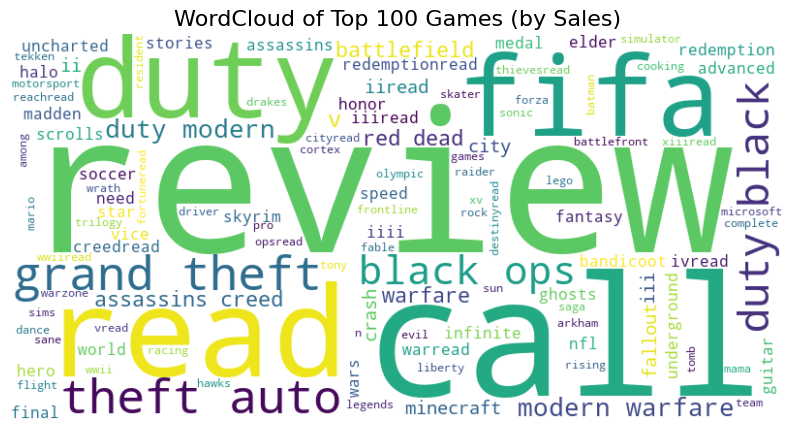

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the top 100 games by sales
top_100_games = data.nlargest(100, 'total_sales')

# Combine all cleaned game names into a single string
text = ' '.join(top_100_games['cleaned_game_name'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Top 100 Games (by Sales)', fontsize=16)
plt.show()

4. Predict the Publisher of the Game Using the Name
This task involves predicting the publisher based on the game name. Start with a rule-based approach and then move to a classification model.

4.1 Rule-Based Approach
Create simple rules based on keywords in the game names. For example:

If the name contains "Mario," predict "Nintendo."
If the name contains "FIFA," predict "Electronic Arts."

In [48]:
def predict_publisher(game_name):
    if 'mario' in game_name:
        return 'Nintendo'
    elif 'fifa' in game_name:
        return 'Electronic Arts'
    elif 'pokemon' in game_name:
        return 'Nintendo'
    elif 'call of duty' in game_name:
        return 'Activision'
    else:
        return 'Unknown'

# Apply the rule-based approach
data['predicted_publisher'] = data['cleaned_game_name'].apply(predict_publisher)

# Evaluate the rule-based approach
accuracy = (data['predicted_publisher'] == data['publisher']).mean()
print(f"Rule-Based Accuracy: {accuracy:.2f}")

Rule-Based Accuracy: 0.05


4.2 Classification Model
Use a machine learning model to predict the publisher based on the game name.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Vectorize the game names
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['cleaned_game_name'])

# Encode the target variable
y = data['publisher']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                                        precision    recall  f1-score   support

                        11 bit studios       1.00      0.33      0.50         3
          20th Century Fox Video Games       0.00      0.00      0.00         1
                              2K Games       0.74      0.67      0.70        21
                               2K Play       1.00      0.40      0.57         5
                             2K Sports       0.83      0.92      0.87        26
                                   3DO       0.00      0.00      0.00         1
                             505 Games       0.50      0.14      0.22         7
                           989 Studios       0.00      0.00      0.00         1
                             ASC Games       0.00      0.00      0.00         2
                   ASCII Entertainment       0.50      0.50      0.50         2
                 Acclaim Entertainment       0.56      0.33      0.42        15
                               Acquire 

C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565:

### SUMMARY

The overall accuracy of the model is 58%, meaning the model correctly predicted the publisher for 58% of the games in the test set.
While this is better than random guessing (given the large number of publishers), there is room for improvement.

The weighted average F1-score is 0.57, which is close to the overall accuracy. This indicates that the model performs better for publishers with higher support.
The macro average F1-score is 0.22, which is much lower. This highlights that the model struggles with publishers that have fewer instances.


1. Business Insights
Model Accuracy (58%):

The model is moderately effective at predicting publishers based on game names. This could be useful for:
Market Analysis: Automatically categorizing games by publisher to analyze market share.
Competitor Analysis: Identifying which publishers dominate certain game genres or themes.
Content Recommendation: Suggesting games from specific publishers based on user preferences.

Imbalanced Dataset:

The model performs better for publishers with more data (e.g., Nintendo, Electronic Arts) and struggles with publishers that have fewer games.
Insight: Publishers with fewer games may not have strong branding or recognizable patterns in their game names. This could indicate a need for better marketing or branding strategies for smaller publishers.
Low Macro F1-Score (0.22):

The model struggles to generalize across all publishers, especially those with low support.
Insight: Smaller publishers may need to differentiate themselves more clearly in the market to stand out.

High Performance for Major Publishers:

Publishers like Nintendo, Electronic Arts, and Ubisoft perform well because their games often have recognizable names tied to popular franchises (e.g., "Mario," "FIFA").
Insight: Major publishers benefit from strong franchise branding, which smaller publishers could emulate to improve their market presence.

In [50]:
import joblib
joblib.dump(model, 'publisher_prediction_model.pkl')

['publisher_prediction_model.pkl']

In [51]:
# Save the vectorizer and model together
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']